Initial setup and first topic model run

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk
import wosis.analysis.plotting as wos_plot

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# Read in data from temporary cache file
RC = mk.RecordCollection("tmp/filtered_corpora.txt")

Corpora consists of 15754 Publications


In [9]:
from wosis.analysis import find_topics

filtered_corpora_df = wosis.rec_to_df(filtered_corpora)
topic_results = find_topics(filtered_corpora_df, num_topics=5)

Topic 1: water model soil flow river parameters sensitivity groundwater runoff data
Topic 2: optimization design method shape topology sensitivity problem element finite structural
Topic 3: energy life cycle environmental emissions production waste assessment lca impact
Topic 4: uncertainty model models stochastic data analysis parameter parameters method bayesian
Topic 5: risk exposure assessment health cancer risks human flood probabilistic dose


In [11]:
# find paper of interest - see if it's still in the corpora
tmp_df = topic_results.corpora_df  
tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

for i in range(subtopic1_topics.num_topics):
    topic_id = i + 1
    tmp_topic = subtopic1_topics.get_topic_by_id(topic_id)
    print("topic_id", topic_id)
    print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

Found paper in topic 4


In [12]:
topic_4_set = topic_results.get_topic_by_id(4)

In [13]:
topic_4_set.loc[:, ~topic_4_set.columns.isin(hide_columns)].head(10)

,year,title,copyright,AU,SO
0,2015,A Practical Method of Nonprobabilistic Reliabi...,,"He, Xin-dang|Gou, Wen-xuan|Liu, Yong-shou|Gao,...",MATHEMATICAL PROBLEMS IN ENGINEERING
6,2017,Performing Global Uncertainty and Sensitivity ...,(C) 2017 American Society of Civil Engineers.,"Zhang, Limao|Wu, Xianguo|Zhu, Hongping|AbouRiz...",JOURNAL OF COMPUTING IN CIVIL ENGINEERING
12,2004,Strategic options and expert systems: a fruitf...,,"Magni, CA|Mastroleo, G|Vignola, M|Facchinetti, G",SOFT COMPUTING
13,2017,A random matrix approach for quantifying model...,(C) 2016 Elsevier B.V. All rights reserved.,"Xiao, Heng|Wang, Jian-Xun|Ghanem, Roger G.",COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...
16,2014,Covariance Matrix Localization Using Drainage ...,,"Yeo, M-J.|Jung, S-P.|Choe, J.",ENERGY SOURCES PART A-RECOVERY UTILIZATION AND...
17,2015,Systematic validation of non-equilibrium therm...,(C) 2015 Elsevier Inc. All rights reserved.,"Miki, Kenji|Panesi, Marco|Prudhomme, Serge",JOURNAL OF COMPUTATIONAL PHYSICS
18,2006,Quantifying uncertainty in critical loads: (A)...,,"Skeffington, R",WATER AIR AND SOIL POLLUTION
20,2013,Parameter Selection Methods in Inverse Problem...,,"Banks, H. T.|Cintron-Arias, Ariel|Kappel, Fran...",MATHEMATICAL MODELING AND VALIDATION IN PHYSIO...
25,2011,Assessment of data and parameter uncertainties...,,"Freni, Gabriele|Mannina, Giorgio|Viviani, Gasp...",WATER SCIENCE AND TECHNOLOGY
29,2010,Monte Carlo algorithms for evaluating Sobol' s...,(C) 2009 Published by Elsevier B.V. on behalf...,"Dimov, I.|Georgieva, R.",MATHEMATICS AND COMPUTERS IN SIMULATION


In [14]:
topic_4_recs = wosis.extract_recs(topic_4_set.loc[:, 'id'], RC, 'Topic of Interest')

In [16]:
topic_4_set.to_csv('../data/topic_4.csv', index=False)

In [15]:
#run topic model on topic 4
topic_4_subtopics = find_topics(topic_4_set, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: uncertainty model uncertainties analysis water data quality models assessment modeling
Topic 2: stochastic polynomial chaos random quantification equations method expansion collocation solution
Topic 3: sensitivity analysis model models global parameters indices input based output
Topic 4: bayesian model data parameter models calibration inference posterior prior estimation
Topic 5: carlo monte sampling method probability simulation failure distribution reliability function


<hr>

Plotting subtopic trends over time. <br>
Two topics are chosen, papers focusing on applications of SA and papers focusing on theoretical development of SA. <br>
The next task is to superimpose the category trends over time. <br>
Journal publication trends and top cited papers to indicate which fields are applying or interested in the theory of UA/SA. <br>
Author citation networks to indicate which fields are collaborating, and journal networks.

In [ ]:
wos_config = wosis.load_config('config.yml')

In [17]:
subtopic1 = topic_4_subtopics.get_topic_by_id(1)
subtopic3 = topic_4_subtopics.get_topic_by_id(3)

In [18]:
uncert_model = wosis.extract_recs(subtopic1['id'], RC, name='uncert_model')
sens_analysis = wosis.extract_recs(subtopic3['id'], RC, name='sens_analysis')

In [ ]:
uncert_model_cites = wosis.get_num_citations(uncert_model_rc, wos_config, cache_dir='tmp')
sens_analysis_cites = wosis.get_num_citations(sens_analysis_rc, wos_config, cache_dir='tmp')

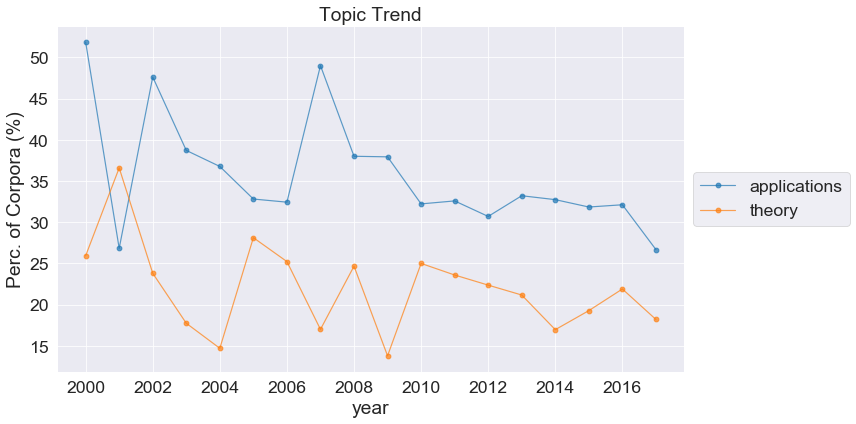

In [20]:
wos_plot.plot_topic_trend([uncert_model, sens_analysis], total_rc=topic_4_recs, title='Subtopic Trend', save_plot_fn='figs/Subtopic Trend Percentage')

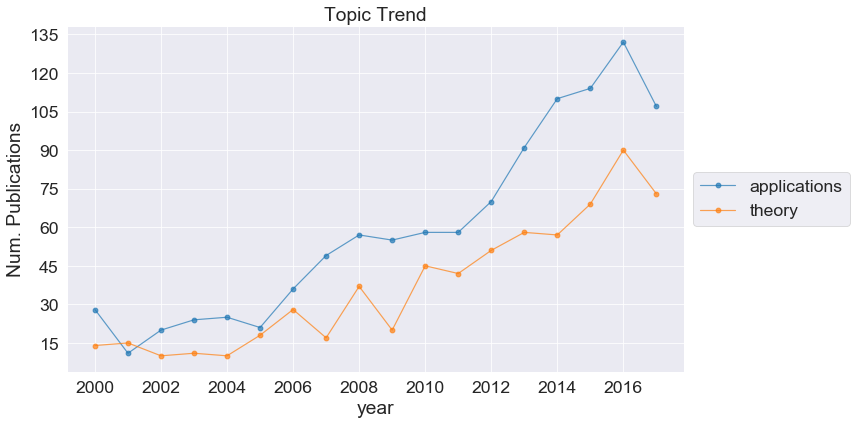

In [21]:
wos_plot.plot_topic_trend([uncert_model, sens_analysis], title='Subtopic Trend', save_plot_fn='figs/Subtopic Trend')

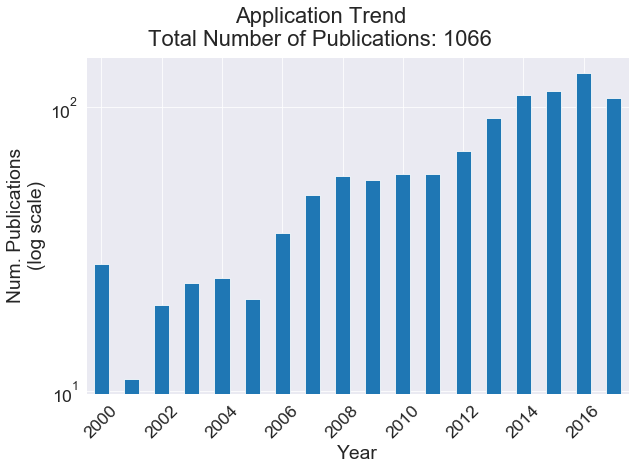

In [22]:
wos_plot.plot_pub_trend(uncert_model, title='Model Uncertainty Subtopic Trend', save_plot_fn='figs/model_uncert_trend_2000-2016.png')

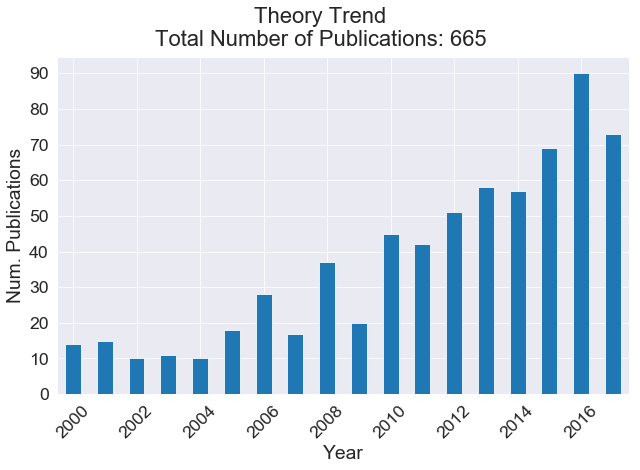

In [23]:
wos_plot.plot_pub_trend(sens_analysis, title='Sensitivity Analysis Subtopic Trend', save_plot_fn='figs/sens_analysis_trend_2000-2016.png')

<hr>
Crtieria matching the subtopics

In [ ]:
from functools import reduce

In [ ]:
subtopics_collated = reduce(lambda x, y: x + y, [uncert_model_rc, sens_analysis_rc])

In [ ]:
wosis.rc_to_df(subtopics_collated).to_csv('../data/subtopics_collated.csv')

1. Frameworks and guidelines for UA/SA

In [ ]:
framework = wosis.keyword_matches(subtopics_collated, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [ ]:
all_framework = framework.combine_recs()

In [ ]:
wos_plot.plot_kw_trend(all_framework, title='Frameworks and guidelines for UA/SA: Keyword and Publication Trend', save_plot_fn='figs/framework_pub_trend.png')

2. Applications of UA/SA

In [ ]:
applications = wosis.keyword_matches(subtopics_collated, ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], threshold=95.0)

In [ ]:
all_applications = applications.combine_recs()

In [ ]:
wos_plot.plot_kw_trend(all_applications, title='Applications of UA/SA: Keyword and Publication Trend', save_plot_fn='figs/app_pub_trend.png')

Trends

In [ ]:
wos_plot.plot_topic_trend([applications, framework], total_rc=subtopics_collated, title='Keyword matches topic trend as a proportion of the collated subtopics', save_plot_fn='figs/collated_topics_keyword_trend_percentage.png')

In [ ]:
wos_plot.plot_topic_trend([applications, framework], title='Keyword matches topic trend', save_plot_fn='figs/collated_topics_keyword_trend.png')

Top cited journals
<br> 1. Framework

In [ ]:
wos_plot.plot_journal_pub_trend(all_framework, top_n=5, save_plot_fn='figs/framework_journal_pub_trend.png', title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

In [ ]:
wos_plot.plot_pubs_per_journal(all_framework, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/framework_journal_pubs.png')

In [ ]:
journals_of_interest_framework = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Computers & Geosciences'.upper(), 'Stochastic Environmental Research and Risk Assessment'.upper()]
pubs_for_journals_framework = wosis.find_pubs_by_journal(all_framework, journals_of_interest_framework)

In [ ]:
data_dir = "trend_3_tmp"  # Using the temporary data directory

# Get citations for each paper
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_framework:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_framework[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_framework = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_framework.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_framework = collection_framework.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_framework = collection_framework.sort_values('citations', ascending=False)
top_cited_in_top_journals_framework.head(10)

In [ ]:
top_cited_in_top_journals_framework.to_csv('../data/top_cited_in_top_journals_framework.csv', index=False)

In [ ]:
top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()

2. Applications

In [ ]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, save_plot_fn='figs/applications_journal_pub_trend.png', title='Applications of UA/SA: Journal Publication Trend')

In [ ]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/app_journal_pubs.png')

In [ ]:
journals_of_interest_app = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Computers & Geosciences'.upper(), 'Stochastic Environmental Research and Risk Assessment'.upper()]
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, journals_of_interest_app)

In [ ]:
paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.head(10)

In [ ]:
top_cited_in_top_journals_app.to_csv('../data/top_cited_in_top_journals_app.csv', index=False)

In [ ]:
top_cited_in_top_journals_app.groupby('year').count()['AU'].plot()